In [4]:
#load tidyverse package
library(tidyverse)

In [23]:
#parameters to set before running
taxonomic_level = "Family" #choose from "Phylum" "Class" "Order" "Family" "Genus" 
sample_number = 20
path_to_working_directory = "." #leave as a "." if you want to set your working directory manually in RStudio "Session"--> "Set Directory" --> "Choose Directory"
######

In [24]:
#read in newly made csv files 

setwd("/media/zaramela/dumbo/vania/raw_data/")
temp = list.files(pattern="tax.*.csv")
temp_list = list()

In [25]:
temp

[1] "tax.ID1-Sample-1.csv"   "tax.ID10-Sample-10.csv" "tax.ID11-Sample-11.csv"
 [4] "tax.ID12-Sample-12.csv" "tax.ID13-Sample-13.csv" "tax.ID14-Sample-14.csv"
 [7] "tax.ID15-Sample-15.csv" "tax.ID16-Sample-16.csv" "tax.ID17-Sample-17.csv"
[10] "tax.ID18-Sample-18.csv" "tax.ID19-Sample-19.csv" "tax.ID2-Sample-2.csv"  
[13] "tax.ID20-Sample-20.csv" "tax.ID3-Sample-3.csv"   "tax.ID4-Sample-4.csv"  
[16] "tax.ID5-Sample-5.csv"   "tax.ID6-Sample-6.csv"   "tax.ID7-Sample-7.csv"  
[19] "tax.ID8-Sample-8.csv"   "tax.ID9-Sample-9.csv"

In [26]:
for (i in 1:length(temp)) {
    sample = gsub(".csv", "", temp[[i]])
    sample2 = gsub("tax.","",sample)
    new = read.csv(temp[i], header = TRUE) 
    new2 = new %>% filter(Kingdom == "Bacteria") %>% select(all_of(taxonomic_level)) %>% group_by_all() %>% summarise(n = n()) %>% mutate(abund = n/(colSums(as.matrix(n)))*100) %>% select(-n)
    colnames(new2) = c(taxonomic_level, sample2)
    temp_list[[length(temp_list) + 1]] <- new2 }

In [27]:
#merge all data frames in list
tax_df = temp_list %>% reduce(full_join, by=taxonomic_level)

#remove "_combined" from sample name
colnames(tax_df) = gsub("-","",colnames(tax_df))

In [28]:
#write summary csv of taxonomic level 
write.csv(tax_df, paste0(taxonomic_level,"_summary.csv"), row.names = FALSE)

#convert data to long format
tax_df_long = tax_df %>% pivot_longer(!taxonomic_level, names_to = "Sample", values_to = "Abundance")

In [35]:
#colour scheme for bubble plot
colours = colorRampPalette(c("#2F4858", "#33658A", "#86BBD8", "#830689", "#F5A614", 
                             "#F26419", "#BB3551",  "#C1D7AE", "#68AC5D", "#EBDDAD"))(sample_number)


#bubble plot
xx = ggplot(tax_df_long, aes(x = Sample, y = reorder(get(taxonomic_level), desc(get(taxonomic_level))))) + 
        geom_point(aes(colour = Sample, size= Abundance), alpha = 0.7) +
        theme(legend.key = element_blank(), 
              legend.title = element_text(size = 10), 
              panel.border = element_rect(fill = NA, colour = "grey80"), 
              axis.text.y = element_text(size = 14), 
              axis.text.x = element_text(size = 14, angle = 90, vjust = 0.3, hjust =1), 
              panel.background = element_blank(), 
              panel.grid.major = element_line(colour = "grey94")) + 
        scale_radius(range=c(1,8), breaks = c(1,10,30,50)) + 
        labs(x = "", y = "", colour = taxonomic_level) + 
        scale_colour_manual(values = colours) + 
        guides(colour = "none")

Warning message:
“Removed 519 rows containing missing values (`geom_point()`).”


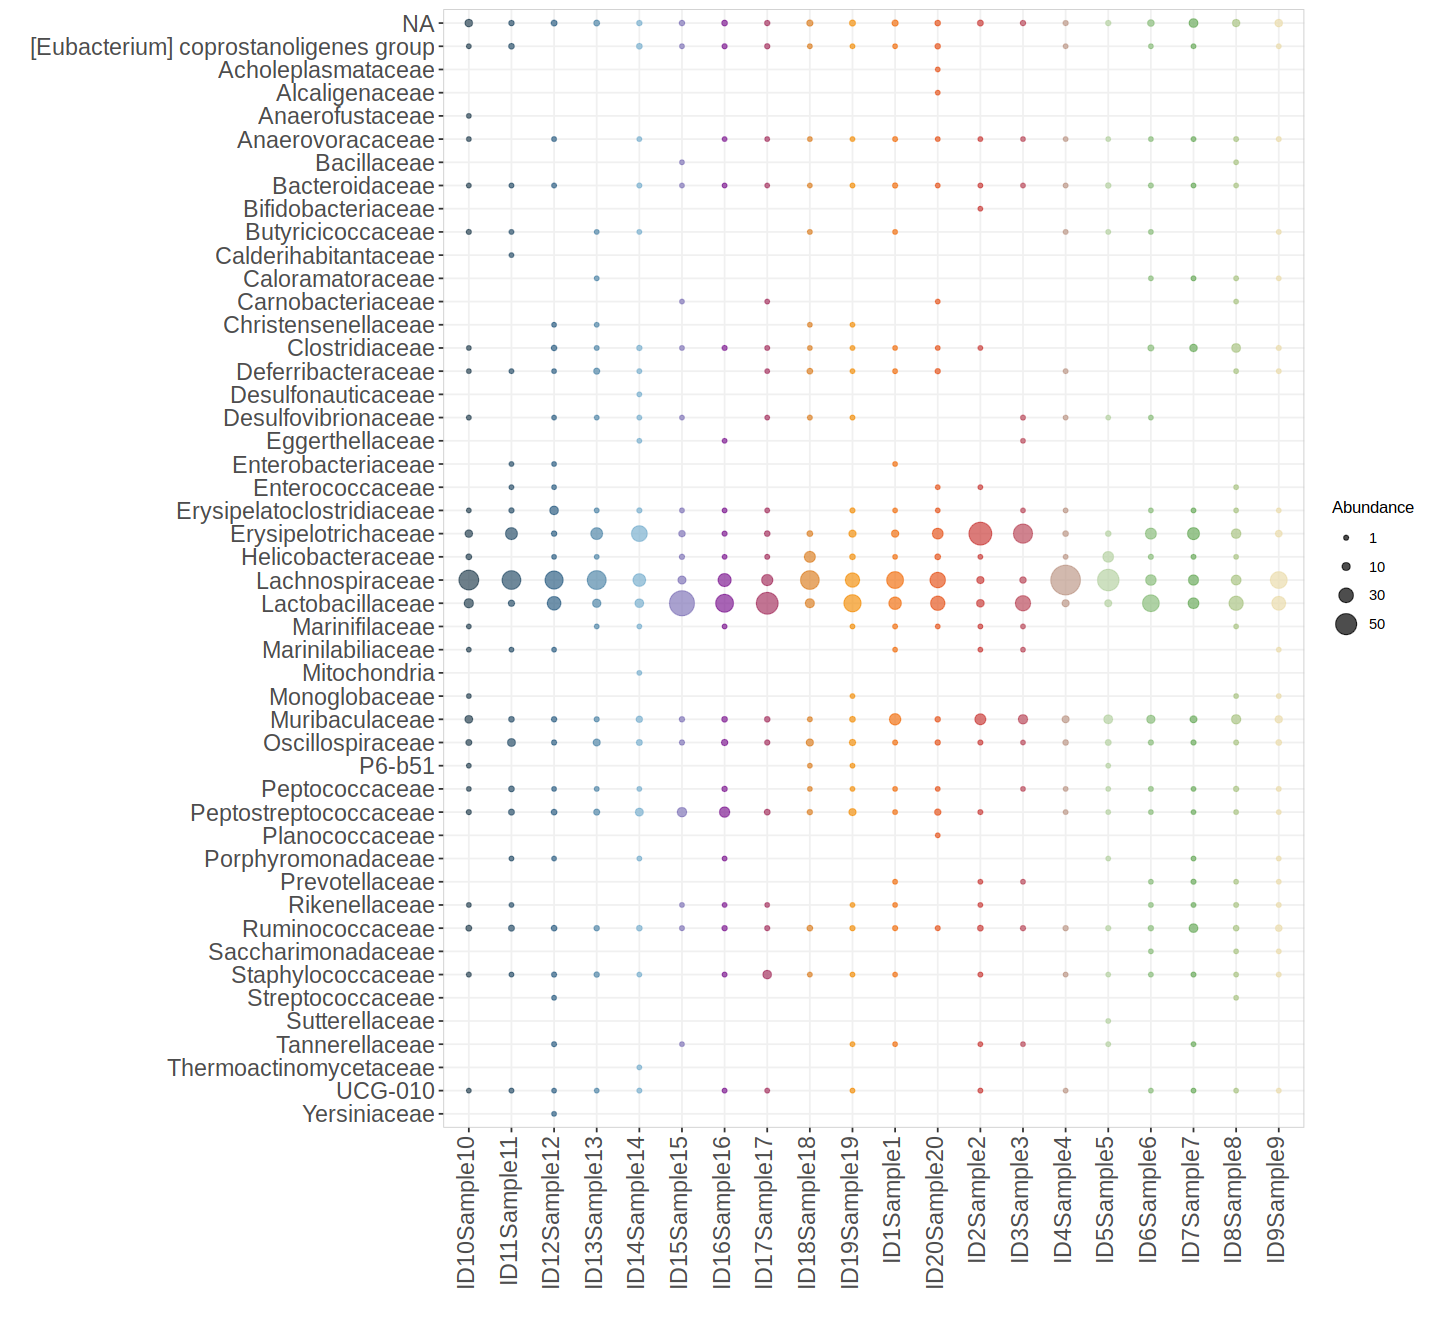

In [36]:
options(repr.plot.width=12, repr.plot.height=11)
xx

In [37]:
#save bubble plot
ggsave(paste0("bubble_plot_",taxonomic_level,".png"), height = 12, width = 15)

Warning message:
“Removed 519 rows containing missing values (`geom_point()`).”


In [38]:
#select top 10 most abundant taxa, based on maximum abundance in data set
tax_df$max = apply(tax_df[,2:ncol(tax_df)], 1, FUN = max, na.rm = TRUE)
tax_df2 <- tax_df[order(-tax_df$max),][1:10,]
 
#colour scheme for bar plot
colours = c("#2F4858", "#33658A", "#86BBD8", "#830689", "#F5A614", "#F26419", "#BB3551",  "#C1D7AE", "#68AC5D", "#EBDDAD")

#convert data to long format
tax_df2_long = tax_df2 %>% select(-max) %>% pivot_longer(!taxonomic_level, names_to = "Sample", values_to = "Abundance")

#remove "_combined" from sample name
tax_df2_long$Sample = gsub("-","",tax_df2_long$Sample)

#bar plot of most abundant taxa
gg = ggplot(tax_df2_long, aes(x = Sample, y = Abundance)) + 
geom_bar(aes(fill = get(taxonomic_level)), colour = "black", position = "stack", stat = "identity") + scale_fill_manual(values = colours) + labs(x = "", y = "Relative Abundance (%)", fill = taxonomic_level) + theme(panel.background = element_blank(), panel.border = element_rect(fill =NA, colour = "black"), axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.3), legend.key = element_blank()) + scale_y_continuous(limits = c(0,100), expand = c(0,0))


Warning message:
“Removed 12 rows containing missing values (`position_stack()`).”


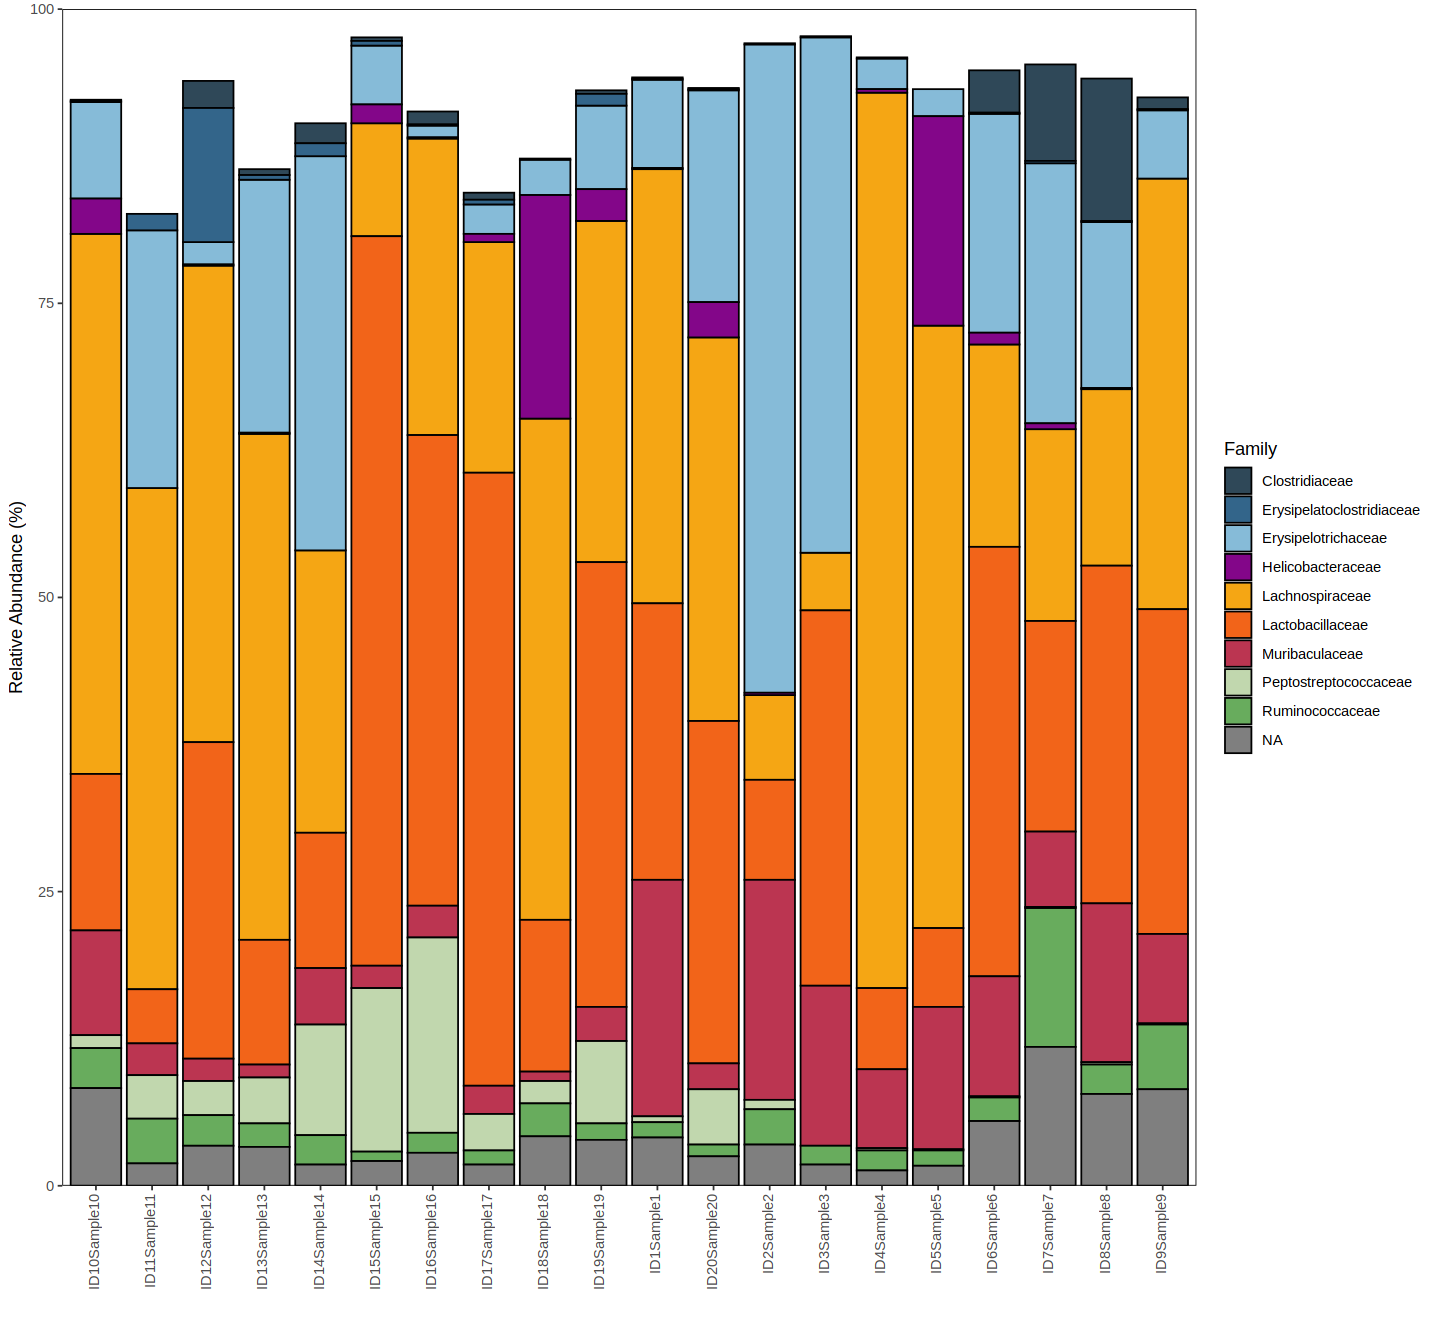

In [39]:
gg

In [ ]:
gg

#save plot
ggsave(paste0("bar_plot_top_",taxonomic_level,".png"), height = 6, width = 5)
